<a href="https://colab.research.google.com/github/Tar-ive/find-fund/blob/master/recommendation_engine/find%26fund_featureengineering_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#second attemmpt to do feature engineering for the grants recommendation system

In [1]:
!pip install hopsworks[python] pandas

In [2]:
!pip install loguru

In [3]:
import hopsworks
from loguru import logger
from google.colab import drive, userdata

HOPSWORKS_API_KEY = userdata.get('HOPSWORKS_API_KEY') # Your Hopsworks API key
HOPSWORKS_HOST = "c.app.hopsworks.ai"  # Your Hopsworks host
PROJECT_NAME = "findandfund"  # Your Hopsworks project name

def connect_to_hopsworks():
    """Connect to Hopsworks and return the project and feature store."""
    try:
        logger.info("Connecting to Hopsworks...")
        project = hopsworks.login(
            api_key_value=HOPSWORKS_API_KEY,
            host=HOPSWORKS_HOST,
            project=PROJECT_NAME
        )
        logger.info("Connected to Hopsworks successfully!")

        # Get the feature store
        fs = project.get_feature_store()
        logger.info("Successfully retrieved the feature store.")

        return project, fs
    except Exception as e:
        logger.error(f"Failed to connect to Hopsworks: {str(e)}")
        return None, None

# Connect to Hopsworks
project, fs = connect_to_hopsworks()
if fs is None:
    logger.warning("Proceeding with local file storage only.")
else:
    logger.info(f"Connected to project: {project.name}")

2025-01-10 05:04:56.080 | INFO     | __main__:connect_to_hopsworks:12 - Connecting to Hopsworks...
2025-01-10 05:04:58.700 | INFO     | __main__:connect_to_hopsworks:18 - Connected to Hopsworks successfully!
2025-01-10 05:04:58.846 | INFO     | __main__:connect_to_hopsworks:22 - Successfully retrieved the feature store.
2025-01-10 05:04:58.849 | INFO     | __main__:<cell line: 31>:34 - Connected to project: findandfund



Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1207504


In [4]:
import pandas as pd

# Load your data
grants_df = pd.read_csv('grants_clean.csv')
researchers_df = pd.read_csv('researchers_clean.csv')

# Display the first few rows of each DataFrame
print("Grants Data:")
print(grants_df.head())

print("\nResearchers Data:")
print(researchers_df.head())

Grants Data:
   opportunity_id      opportunity_number  \
0           15936              07HQPA0028   
1           15937    ED-GRANTS-070907-001   
2           15939    ED-GRANTS-070907-002   
3           15941       NNH07ZEA001N-EDL1   
4           17675  CNCS-GRANTS-071307-001   

                                   opportunity_title opportunity_status  \
0  Cooperative Ecosystem Studies Unit, Rocky Moun...           archived   
1  Youth violence and related issues in persisten...           archived   
2  State data collection; technical assistance CF...           archived   
3        ROA 2007: A.6 Entry, Descent, and Landing 1           archived   
4                               Volunteer Management           archived   

      agency agency_code                                     agency_name  \
0  DOI-USGS1   DOI-USGS1                               Geological Survey   
1         ED          ED                         Department of Education   
2         ED          ED             

In [5]:
grants_df['post_date'] = pd.to_datetime(grants_df['post_date'], errors='coerce')

In [6]:
grants_df.shape

(5000, 20)

In [7]:
# Remove category_explanation column
grants_df = grants_df.drop('category_explanation', axis=1)

# Remove rows with missing eligibility description
grants_df_clean = grants_df[grants_df['eligibility_description'].notna()]

# Print summary of changes
print("Original dataset shape:", grants_df.shape)
print("New dataset shape:", grants_df_clean.shape)
print(f"Removed {grants_df.shape[0] - grants_df_clean.shape[0]} rows with missing eligibility descriptions")

# Display data info
print("\nColumns in cleaned dataset:")
for col in grants_df_clean.columns:
    print(f"- {col}")

print("\nMissing values in cleaned dataset:")
print(grants_df_clean.isnull().sum())

# Show sample of monetary columns
print("\nMonetary fields summary:")
money_cols = ['award_ceiling', 'award_floor', 'estimated_total_funding']
print(grants_df_clean[money_cols].describe())

# Save cleaned dataset
grants_df_clean.to_csv('grants_final.csv', index=False)

# Show head of cleaned dataset with better formatting
print("\nSample of cleaned dataset:")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(grants_df_clean.head())

Original dataset shape: (5000, 19)
New dataset shape: (3470, 19)
Removed 1530 rows with missing eligibility descriptions

Columns in cleaned dataset:
- opportunity_id
- opportunity_number
- opportunity_title
- opportunity_status
- agency
- agency_code
- agency_name
- category
- award_ceiling
- award_floor
- estimated_total_funding
- expected_awards
- post_date
- close_date
- funding_categories
- applicant_types
- funding_instruments
- summary_description
- eligibility_description

Missing values in cleaned dataset:
opportunity_id               0
opportunity_number           0
opportunity_title            0
opportunity_status           0
agency                       0
agency_code                  0
agency_name                  0
category                     1
award_ceiling                0
award_floor                  0
estimated_total_funding      0
expected_awards              0
post_date                    0
close_date                 332
funding_categories           2
applicant_type

In [8]:
grants_df_clean.shape

(3470, 19)

In [9]:
grants_df_clean.isnull().sum()

,0
opportunity_id,0
opportunity_number,0
opportunity_title,0
opportunity_status,0
agency,0
agency_code,0
agency_name,0
category,1
award_ceiling,0
award_floor,0


In [10]:
grants_df_clean.dtypes

,0
opportunity_id,int64
opportunity_number,object
opportunity_title,object
opportunity_status,object
agency,object
agency_code,object
agency_name,object
category,object
award_ceiling,float64
award_floor,float64


In [11]:
researchers_df.shape

(500, 46)

In [12]:
researchers_df.isnull().sum()

,0
researcher_id,0
researcher_name,0
total_citations,0
total_works,0
h_index,0
i10_index,0
concept_1,0
concept_1_score,0
concept_2,0
concept_2_score,0


In [13]:
researchers_df.dtypes

,0
researcher_id,object
researcher_name,object
total_citations,int64
total_works,int64
h_index,int64
i10_index,int64
concept_1,object
concept_1_score,float64
concept_2,object
concept_2_score,float64


# handelling missing values in grants data

In [14]:
grants_clean_df = grants_df_clean

In [15]:
# Fill missing values
grants_clean_df['category'] = grants_clean_df['category'].fillna('unknown')
grants_clean_df['close_date'] = grants_clean_df['close_date'].fillna('unknown')
grants_clean_df['funding_categories'] = grants_clean_df['funding_categories'].fillna('unknown')
grants_clean_df['applicant_types'] = grants_clean_df['applicant_types'].fillna('unknown')
grants_clean_df['funding_instruments'] = grants_clean_df['funding_instruments'].fillna('unknown')

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [16]:
grants_clean_df['close_date'] = pd.to_datetime(grants_clean_df['close_date'], errors='coerce')

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# some feature engineering for grants data

In [17]:
# Funding Range
grants_clean_df['funding_range'] = grants_clean_df['award_ceiling'] - grants_clean_df['award_floor']

# Description Length
grants_clean_df['summary_description_length'] = grants_clean_df['summary_description'].str.len()
grants_clean_df['eligibility_description_length'] = grants_clean_df['eligibility_description'].str.len()

# Funding Types Count
grants_clean_df['funding_types_count'] = grants_clean_df['funding_categories'].str.count(',') + 1

# Applicant Types Count
grants_clean_df['applicant_types_count'] = grants_clean_df['applicant_types'].str.count(',') + 1

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [18]:
grants_clean_df.to_csv('grants_final_cleaned.csv', index=False)

In [19]:
grants_clean_df['close_date'] = grants_clean_df['close_date'].dt.strftime('%Y-%m-%d')

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [20]:
grants_clean_df['funding_types_count'] = grants_clean_df['funding_types_count'].astype(float)
grants_clean_df['applicant_types_count'] = grants_clean_df['applicant_types_count'].astype(float)

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [21]:
grants_clean_df['has_funding_limit'] = grants_clean_df.get('has_funding_limit', 0)
grants_clean_df['agency_group'] = grants_clean_df.get('agency_group', 'unknown')

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [22]:
grants_clean_df = grants_clean_df.drop(columns=['category_explanation'], errors='ignore')

In [23]:
grants_clean_df.columns

Index(['opportunity_id', 'opportunity_number', 'opportunity_title', 'opportunity_status', 'agency',
       'agency_code', 'agency_name', 'category', 'award_ceiling', 'award_floor',
       'estimated_total_funding', 'expected_awards', 'post_date', 'close_date',
       'funding_categories', 'applicant_types', 'funding_instruments', 'summary_description',
       'eligibility_description', 'funding_range', 'summary_description_length',
       'eligibility_description_length', 'funding_types_count', 'applicant_types_count',
       'has_funding_limit', 'agency_group'],
      dtype='object')

# additional cleaning for researchers data


In [24]:
# Fill missing values for top_work columns
for i in range(1, 6):
    researchers_df[f'top_work_{i}_source'] = researchers_df[f'top_work_{i}_source'].fillna('unknown')
    researchers_df[f'top_work_{i}_id'] = researchers_df[f'top_work_{i}_id'].fillna('unknown')
    researchers_df[f'top_work_{i}_type'] = researchers_df[f'top_work_{i}_type'].fillna('unknown')
    researchers_df[f'top_work_{i}_is_oa'] = researchers_df[f'top_work_{i}_is_oa'].fillna(False)
    researchers_df[f'top_work_{i}_keywords'] = researchers_df[f'top_work_{i}_keywords'].fillna('unknown')

# Fill missing values for top_collaborator columns
for i in range(1, 6):
    researchers_df[f'top_collaborator_{i}'] = researchers_df[f'top_collaborator_{i}'].fillna('unknown')

In [25]:
researchers_df.columns

Index(['researcher_id', 'researcher_name', 'total_citations', 'total_works', 'h_index',
       'i10_index', 'concept_1', 'concept_1_score', 'concept_2', 'concept_2_score', 'years_active',
       'recent_works_count', 'recent_citations', 'unique_venues', 'avg_coauthors',
       'open_access_ratio', 'top_work_1_id', 'top_work_1_type', 'top_work_1_is_oa',
       'top_work_1_keywords', 'top_work_1_source', 'top_work_2_id', 'top_work_2_type',
       'top_work_2_is_oa', 'top_work_2_keywords', 'top_work_2_source', 'top_work_3_id',
       'top_work_3_type', 'top_work_3_is_oa', 'top_work_3_keywords', 'top_work_3_source',
       'top_work_4_id', 'top_work_4_type', 'top_work_4_is_oa', 'top_work_4_keywords',
       'top_work_4_source', 'top_work_5_id', 'top_work_5_type', 'top_work_5_is_oa',
       'top_work_5_keywords', 'top_work_5_source', 'top_collaborator_1', 'top_collaborator_2',
       'top_collaborator_3', 'top_collaborator_4', 'top_collaborator_5'],
      dtype='object')

# some extra data cleaning before putitng into hopsworks.

In [29]:
# Convert grants data types
grants_clean_df['close_date'] = grants_clean_df['close_date'].astype(str)  # Ensure close_date is string
grants_clean_df['funding_types_count'] = grants_clean_df['funding_types_count'].astype(float)
grants_clean_df['applicant_types_count'] = grants_clean_df['applicant_types_count'].astype(float)

# Convert researchers data types
researchers_df['impact_ratio'] = researchers_df['impact_ratio'].astype(float)
researchers_df['recent_impact_ratio'] = researchers_df['recent_impact_ratio'].astype(float)
researchers_df['collaboration_score'] = researchers_df['collaboration_score'].astype(float)
researchers_df['productivity_rate'] = researchers_df['productivity_rate'].astype(float)

# feature engineering


In [28]:
# Impact Ratio
researchers_df['impact_ratio'] = researchers_df['total_citations'] / researchers_df['total_works'].clip(lower=1)

# Recent Impact Ratio
researchers_df['recent_impact_ratio'] = researchers_df['recent_citations'] / researchers_df['recent_works_count'].clip(lower=1)

# Collaboration Score
researchers_df['collaboration_score'] = researchers_df['avg_coauthors'] * researchers_df['unique_venues']

# Productivity Rate
researchers_df['productivity_rate'] = researchers_df['total_works'] / researchers_df['years_active'].clip(lower=1)

In [30]:
researchers_df.to_csv('researchers_final_cleaned.csv', index=False)

# Push Data to Hopsworks Feature Store


In [ ]:
# # Delete the 'grants' feature group (if it exists)
# try:
#     grants_fg = fs.get_feature_group(name='grants', version=1)
#     grants_fg.delete()
#     logger.info("Deleted existing 'grants' feature group.")
# except Exception as e:
#     logger.warning(f"Could not delete 'grants' feature group: {str(e)}")

# # Delete the 'researchers' feature group (if it exists)
# try:
#     researchers_fg = fs.get_feature_group(name='researchers', version=1)
#     researchers_fg.delete()
#     logger.info("Deleted existing 'researchers' feature group.")
# except Exception as e:
#     logger.warning(f"Could not delete 'researchers' feature group: {str(e)}")

In [ ]:
# # Create grants feature group
# grants_fg = fs.get_or_create_feature_group(
#     name='grants',
#     version=1,
#     description='Processed grants data',
#     primary_key=['opportunity_id'],  # Replace with your primary key column
#     online_enabled=True,
#     event_time='post_date'  # Replace with your event time column (if applicable)
# )

# # Create researchers feature group
# researchers_fg = fs.get_or_create_feature_group(
#     name='researchers',
#     version=1,
#     description='Processed researchers data',
#     primary_key=['researcher_id'],  # Replace with your primary key column
#     online_enabled=True
# )

In [ ]:
# def insert_data(fg, df):
#     """Insert data into a feature group."""
#     try:
#         logger.info(f"Inserting data into feature group '{fg.name}'...")
#         fg.insert(df, write_options={"wait_for_job": True})
#         logger.info(f"Data inserted into feature group '{fg.name}' successfully.")
#         return True
#     except Exception as e:
#         logger.error(f"Error inserting data into feature group '{fg.name}': {str(e)}")
#         return False

# # Insert grants data
# grants_success = insert_data(grants_fg, grants_clean_df)

# # Insert researchers data
# researchers_success = insert_data(researchers_fg, researchers_df)

# if grants_success and researchers_success:
#     logger.info("Both feature groups created and data inserted successfully!")
# else:
#     logger.warning("Failed to insert data into one or more feature groups.")

# Validating data from hopsworks to check if there is ny changes in data or not.

In [31]:
# Retrieve the feature group by name
grants_fg = fs.get_feature_group(name="grants", version=1)
researchers_fg = fs.get_feature_group(name="researchers", version=1)


In [32]:
# Read data from the feature group
grants = grants_fg.read()
researchers = researchers_fg.read()

# Display the first few rows of the data
print(grants_df.head())
print(researchers_df.head())

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (2.04s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.85s) 
   opportunity_id      opportunity_number                                  opportunity_title  \
0           15936              07HQPA0028  Cooperative Ecosystem Studies Unit, Rocky Moun...   
1           15937    ED-GRANTS-070907-001  Youth violence and related issues in persisten...   
2           15939    ED-GRANTS-070907-002  State data collection; technical assistance CF...   
3           15941       NNH07ZEA001N-EDL1        ROA 2007: A.6 Entry, Descent, and Landing 1   
4           17675  CNCS-GRANTS-071307-001                               Volunteer Management   

  opportunity_status     agency agency_code                                     agency_name  \
0           archived  DOI-USGS1   DOI-USGS1                               Geological Survey   
1           archived         ED          ED                  

In [33]:
# Check the shape of the data
print(grants_df.shape)
print(researchers_df.shape)

# Get summary statistics
print(grants_df.describe())
print(researchers_df.describe())

# Check for missing values
print(grants_df.isnull().sum())
print(researchers_df.isnull().sum())

(5000, 19)
(500, 50)
       opportunity_id  award_ceiling   award_floor  estimated_total_funding  expected_awards  \
count     5000.000000   5.000000e+03  5.000000e+03             5.000000e+03       5000.00000   
mean     44692.556600   3.198742e+06  8.727985e+05             8.805624e+06         82.49000   
min      15936.000000   0.000000e+00  0.000000e+00             0.000000e+00          0.00000   
25%      42814.250000   0.000000e+00  0.000000e+00             0.000000e+00          0.00000   
50%      44584.500000   6.000000e+04  0.000000e+00             1.000000e+05          1.00000   
75%      46723.000000   4.500000e+05  5.000000e+03             2.000000e+06          4.00000   
max      48949.000000   1.300000e+09  1.300000e+09             2.600000e+09     175000.00000   
std       2576.815863   2.979877e+07  1.988934e+07             7.276693e+07       3301.66386   

                           post_date  
count                           5000  
mean   2008-09-28 12:35:42.719999744

In [36]:
# Retrieve the feature groups
grants_fg = fs.get_feature_group(name='grants', version=1)
researchers_fg = fs.get_feature_group(name='researchers', version=1)

# Read the data into Pandas DataFrames
grants_data_from_hopsworks = grants_fg.read()
researchers_data_from_hopsworks = researchers_fg.read()

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.99s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.61s) 


In [34]:
grants_data= grants_clean_df
researchers_data = researchers_df

In [37]:
grants_validation = grants_data.equals(grants_data_from_hopsworks)
print(f"Grants data validation: {'Success' if grants_validation else 'Failure'}")

# Validate researchers data
researchers_validation = researchers_data.equals(researchers_data_from_hopsworks)
print(f"Researchers data validation: {'Success' if researchers_validation else 'Failure'}")


Grants data validation: Failure
Researchers data validation: Failure


In [38]:
# Check schema for grants data
print("Original grants schema:", grants_data.dtypes)
print("Hopsworks grants schema:", grants_data_from_hopsworks.dtypes)

# Check schema for researchers data
print("Original researchers schema:", researchers_data.dtypes)
print("Hopsworks researchers schema:", researchers_data_from_hopsworks.dtypes)

Original grants schema: opportunity_id                             int64
opportunity_number                        object
opportunity_title                         object
opportunity_status                        object
agency                                    object
agency_code                               object
agency_name                               object
category                                  object
award_ceiling                            float64
award_floor                              float64
estimated_total_funding                  float64
expected_awards                          float64
post_date                         datetime64[ns]
close_date                                object
funding_categories                        object
applicant_types                           object
funding_instruments                       object
summary_description                       object
eligibility_description                   object
funding_range                            floa

In [39]:
print(f"Original grants row count: {len(grants_data)}")
print(f"Hopsworks grants row count: {len(grants_data_from_hopsworks)}")

print(f"Original researchers row count: {len(researchers_data)}")
print(f"Hopsworks researchers row count: {len(researchers_data_from_hopsworks)}")

Original grants row count: 3470
Hopsworks grants row count: 3470
Original researchers row count: 500
Hopsworks researchers row count: 500


In [40]:
# Compare grants data
grants_diff = pd.concat([grants_data, grants_data_from_hopsworks]).drop_duplicates(keep=False)
print("Differences in grants data:")
print(grants_diff)

# Compare researchers data
researchers_diff = pd.concat([researchers_data, researchers_data_from_hopsworks]).drop_duplicates(keep=False)
print("Differences in researchers data:")
print(researchers_diff)

Differences in grants data:
      opportunity_id      opportunity_number                                  opportunity_title  \
0              15936              07HQPA0028  Cooperative Ecosystem Studies Unit, Rocky Moun...   
1              15937    ED-GRANTS-070907-001  Youth violence and related issues in persisten...   
2              15939    ED-GRANTS-070907-002  State data collection; technical assistance CF...   
3              15941       NNH07ZEA001N-EDL1        ROA 2007: A.6 Entry, Descent, and Landing 1   
4              17675  CNCS-GRANTS-071307-001                               Volunteer Management   
...              ...                     ...                                                ...   
3465           47238             AFRP-09-N02                   Cottonwood Creek Sediment Budget   
3466           44951              PAR-07-161  Innovations in Biomedical Computational Scienc...   
3467           44543      EPA-R9-WST7-09-004                 Tribal Resource Cons

In [41]:
# Check for missing or extra columns in grants data
grants_original_columns = set(grants_data.columns)
grants_hopsworks_columns = set(grants_data_from_hopsworks.columns)

print("Missing columns in Hopsworks grants data:", grants_original_columns - grants_hopsworks_columns)
print("Extra columns in Hopsworks grants data:", grants_hopsworks_columns - grants_original_columns)

# Check for missing or extra columns in researchers data
researchers_original_columns = set(researchers_data.columns)
researchers_hopsworks_columns = set(researchers_data_from_hopsworks.columns)

print("Missing columns in Hopsworks researchers data:", researchers_original_columns - researchers_hopsworks_columns)
print("Extra columns in Hopsworks researchers data:", researchers_hopsworks_columns - researchers_original_columns)

Missing columns in Hopsworks grants data: set()
Extra columns in Hopsworks grants data: set()
Missing columns in Hopsworks researchers data: set()
Extra columns in Hopsworks researchers data: set()


In [42]:
# Compare data types for grants data
grants_dtype_diff = grants_data.dtypes != grants_data_from_hopsworks.dtypes
print("Data type differences in grants data:")
print(grants_dtype_diff)

# Compare data types for researchers data
researchers_dtype_diff = researchers_data.dtypes != researchers_data_from_hopsworks.dtypes
print("Data type differences in researchers data:")
print(researchers_dtype_diff)

Data type differences in grants data:
opportunity_id                    False
opportunity_number                False
opportunity_title                 False
opportunity_status                False
agency                            False
agency_code                       False
agency_name                       False
category                          False
award_ceiling                     False
award_floor                       False
estimated_total_funding           False
expected_awards                   False
post_date                          True
close_date                        False
funding_categories                False
applicant_types                   False
funding_instruments               False
summary_description               False
eligibility_description           False
funding_range                     False
summary_description_length        False
eligibility_description_length    False
funding_types_count               False
applicant_types_count             False
ha

In [43]:
# Check for duplicates in primary key columns
grants_primary_key_duplicates = grants_data_from_hopsworks.duplicated(subset=['opportunity_id']).sum()
researchers_primary_key_duplicates = researchers_data_from_hopsworks.duplicated(subset=['researcher_id']).sum()

print(f"Grants primary key duplicates: {grants_primary_key_duplicates}")
print(f"Researchers primary key duplicates: {researchers_primary_key_duplicates}")

Grants primary key duplicates: 0
Researchers primary key duplicates: 0


# some more feature engineering.

In [45]:
# Retrieve the feature groups
grants_fg = fs.get_feature_group(name='grants', version=1)
researchers_fg = fs.get_feature_group(name='researchers', version=1)

# Read the data into Pandas DataFrames
grants_data_from_hopsworks = grants_fg.read()
researchers_data_from_hopsworks = researchers_fg.read()

# Print the columns of the data
print("Grants data columns:", grants_data_from_hopsworks.columns.tolist())
print("Researchers data columns:", researchers_data_from_hopsworks.columns.tolist())

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.71s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.56s) 
Grants data columns: ['opportunity_id', 'opportunity_number', 'opportunity_title', 'opportunity_status', 'agency', 'agency_code', 'agency_name', 'category', 'award_ceiling', 'award_floor', 'estimated_total_funding', 'expected_awards', 'post_date', 'close_date', 'funding_categories', 'applicant_types', 'funding_instruments', 'summary_description', 'eligibility_description', 'funding_range', 'summary_description_length', 'eligibility_description_length', 'funding_types_count', 'applicant_types_count', 'has_funding_limit', 'agency_group']
Researchers data columns: ['researcher_id', 'researcher_name', 'total_citations', 'total_works', 'h_index', 'i10_index', 'concept_1', 'concept_1_score', 'concept_2', 'concept_2_score', 'years_active', 'recent_works_count', 'recent_citations', 'unique_venues', 'avg_coauthors', 'open_acc

In [46]:
researchers_data_from_hopsworks['research_impact_score'] = (
    researchers_data_from_hopsworks['h_index'] * 0.4 +
    researchers_data_from_hopsworks['total_citations'] * 0.3 +
    researchers_data_from_hopsworks['i10_index'] * 0.3
)

In [47]:
researchers_data_from_hopsworks['concept_diversity'] = (
    researchers_data_from_hopsworks['concept_1_score'] +
    researchers_data_from_hopsworks['concept_2_score']
)

In [48]:
researchers_data_from_hopsworks['collaboration_network_strength'] = (
    researchers_data_from_hopsworks['collaboration_score'] * 0.7 +
    researchers_data_from_hopsworks['avg_coauthors'] * 0.3
)

In [49]:
researchers_data_from_hopsworks['open_access_contribution'] = (
    researchers_data_from_hopsworks['open_access_ratio'] * 100  # Convert to percentage
)

In [50]:
def aggregate_keywords(row):
    keywords = []
    for i in range(1, 6):
        keywords.extend(row[f'top_work_{i}_keywords'].split(', '))
    return ', '.join(set(keywords))  # Remove duplicates

researchers_data_from_hopsworks['aggregated_keywords'] = researchers_data_from_hopsworks.apply(aggregate_keywords, axis=1)

In [51]:
grants_data_from_hopsworks['funding_range_score'] = (
    grants_data_from_hopsworks['award_ceiling'] - grants_data_from_hopsworks['award_floor']
)

In [52]:
grants_data_from_hopsworks['funding_type_diversity'] = (
    grants_data_from_hopsworks['funding_types_count'] +
    grants_data_from_hopsworks['applicant_types_count']
)

In [53]:
grants_data_from_hopsworks['description_complexity'] = (
    grants_data_from_hopsworks['summary_description_length'] * 0.6 +
    grants_data_from_hopsworks['eligibility_description_length'] * 0.4
)

In [54]:
agency_reputation = {
    'Agency Group A': 5,
    'Agency Group B': 4,
    'Agency Group C': 3
}
grants_data_from_hopsworks['agency_reputation_score'] = grants_data_from_hopsworks['agency_group'].map(agency_reputation)

In [67]:
# Convert date columns to datetime and remove timezone information
grants_data_from_hopsworks['post_date'] = pd.to_datetime(grants_data_from_hopsworks['post_date']).dt.tz_localize(None)
grants_data_from_hopsworks['close_date'] = pd.to_datetime(grants_data_from_hopsworks['close_date']).dt.tz_localize(None)

# Calculate funding urgency (difference in days)
grants_data_from_hopsworks['funding_urgency'] = (
    (grants_data_from_hopsworks['close_date'] - grants_data_from_hopsworks['post_date']).dt.days
)

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=10, stop_words='english')
summary_keywords = tfidf.fit_transform(grants_data_from_hopsworks['summary_description'].astype(str))
grants_data_from_hopsworks['summary_keywords'] = list(summary_keywords.toarray())

# visualizing features for better understanding


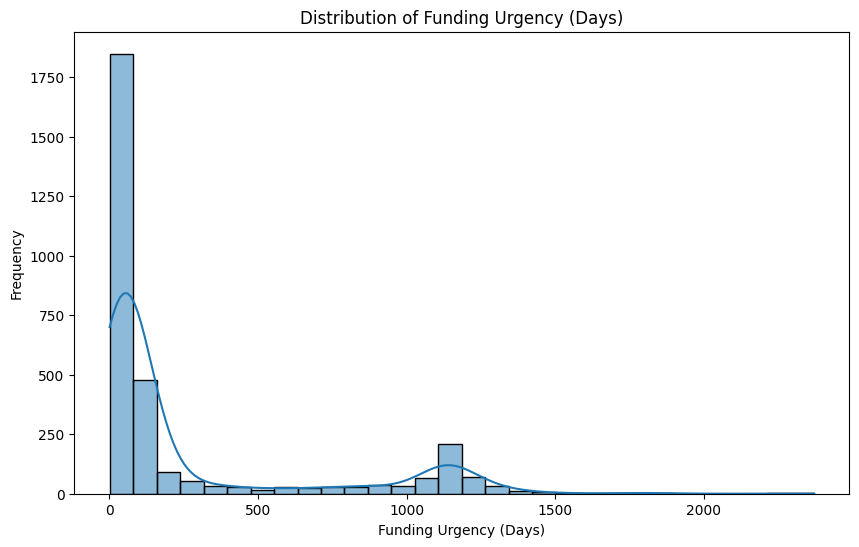

In [68]:
plt.figure(figsize=(10, 6))
sns.histplot(grants_data_from_hopsworks['funding_urgency'], bins=30, kde=True)
plt.title('Distribution of Funding Urgency (Days)')
plt.xlabel('Funding Urgency (Days)')
plt.ylabel('Frequency')
plt.show()

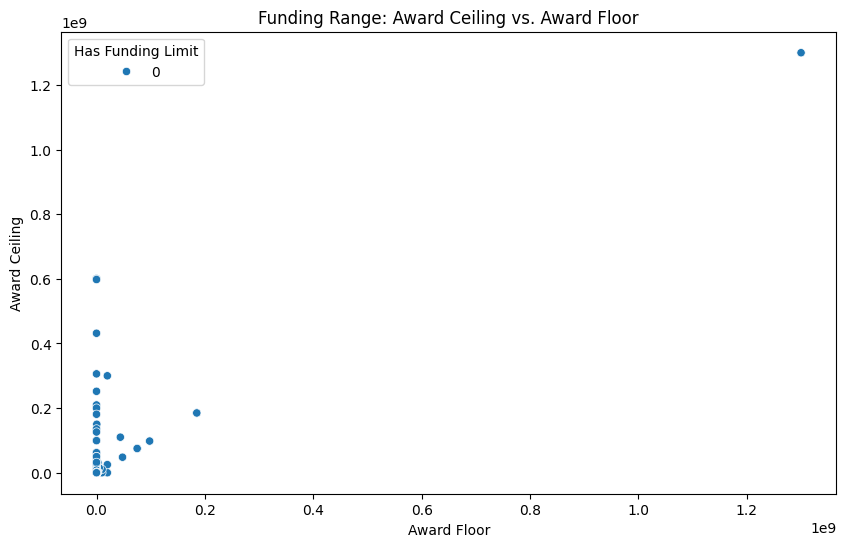

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='award_floor',
    y='award_ceiling',
    data=grants_data_from_hopsworks,
    hue='has_funding_limit'
)
plt.title('Funding Range: Award Ceiling vs. Award Floor')
plt.xlabel('Award Floor')
plt.ylabel('Award Ceiling')
plt.legend(title='Has Funding Limit')
plt.show()

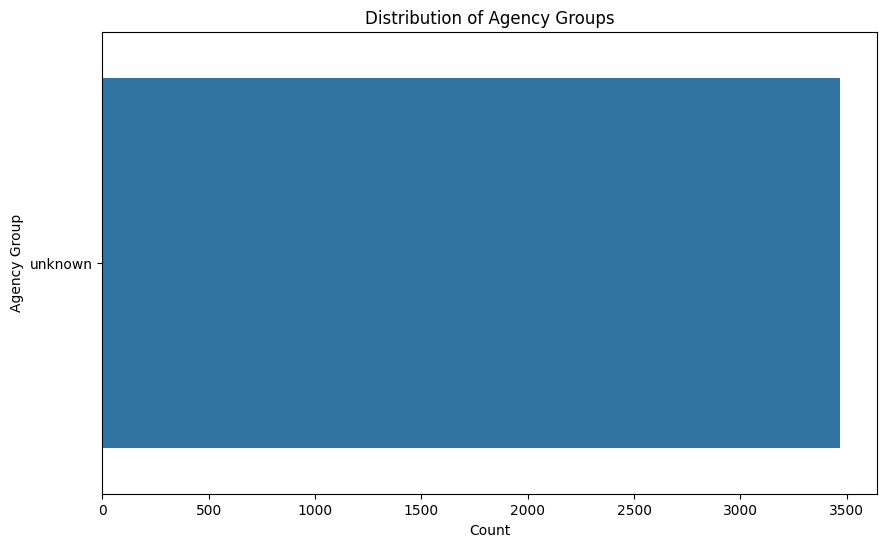

In [60]:
plt.figure(figsize=(10, 6))
sns.countplot(
    y='agency_group',
    data=grants_data_from_hopsworks,
    order=grants_data_from_hopsworks['agency_group'].value_counts().index
)
plt.title('Distribution of Agency Groups')
plt.xlabel('Count')
plt.ylabel('Agency Group')
plt.show()

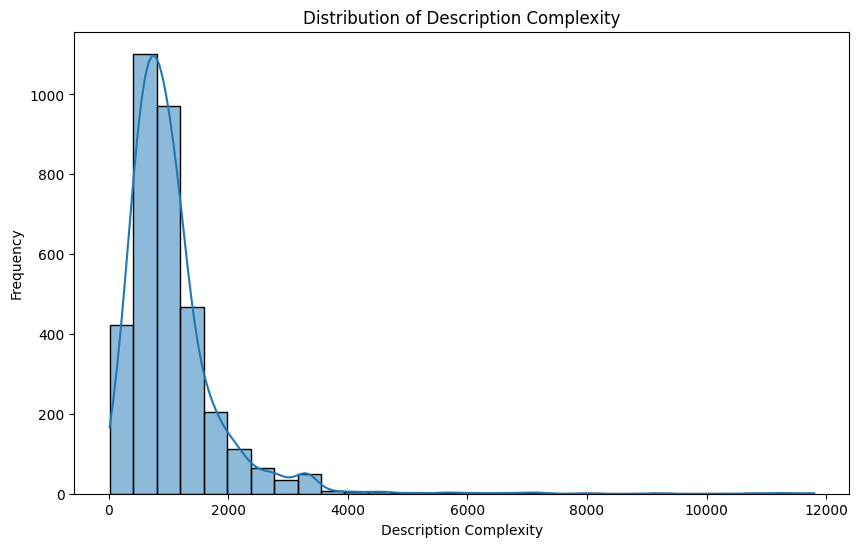

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(grants_data_from_hopsworks['description_complexity'], bins=30, kde=True)
plt.title('Distribution of Description Complexity')
plt.xlabel('Description Complexity')
plt.ylabel('Frequency')
plt.show()

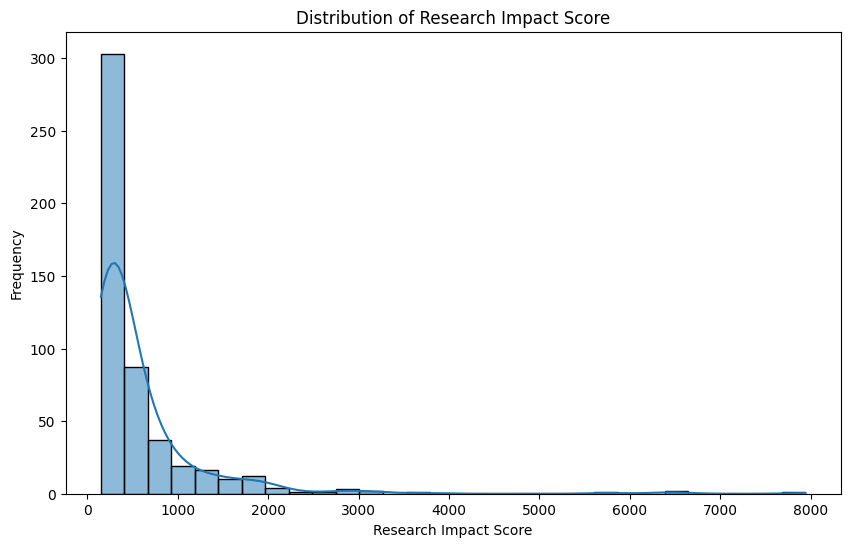

In [63]:
plt.figure(figsize=(10, 6))
sns.histplot(researchers_data_from_hopsworks['research_impact_score'], bins=30, kde=True)
plt.title('Distribution of Research Impact Score')
plt.xlabel('Research Impact Score')
plt.ylabel('Frequency')
plt.show()

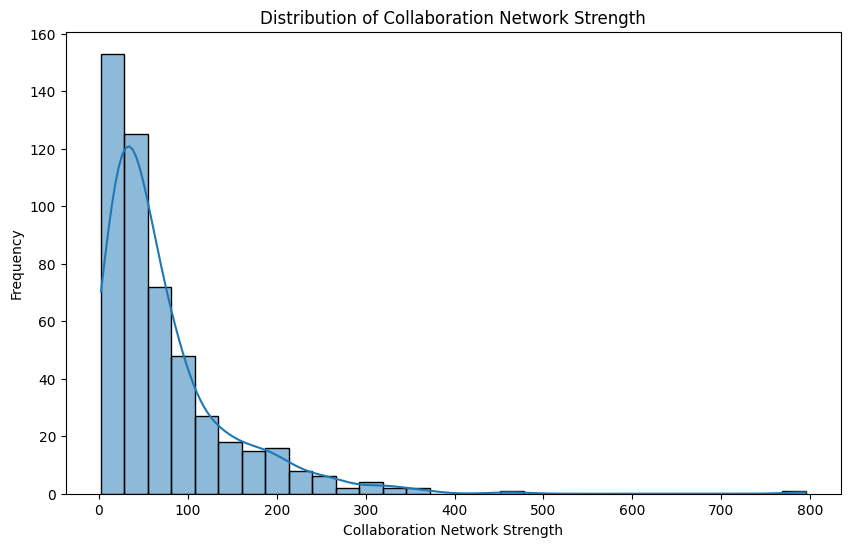

In [64]:
plt.figure(figsize=(10, 6))
sns.histplot(researchers_data_from_hopsworks['collaboration_network_strength'], bins=30, kde=True)
plt.title('Distribution of Collaboration Network Strength')
plt.xlabel('Collaboration Network Strength')
plt.ylabel('Frequency')
plt.show()

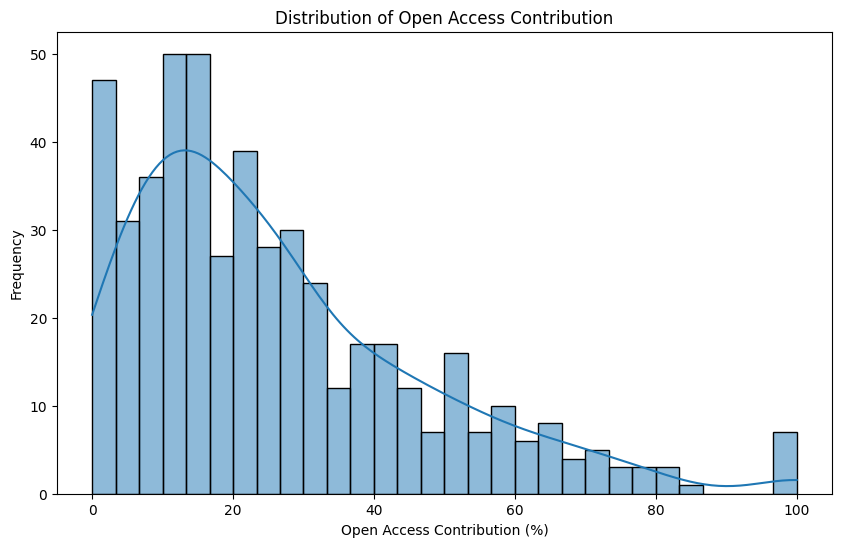

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(researchers_data_from_hopsworks['open_access_contribution'], bins=30, kde=True)
plt.title('Distribution of Open Access Contribution')
plt.xlabel('Open Access Contribution (%)')
plt.ylabel('Frequency')
plt.show()

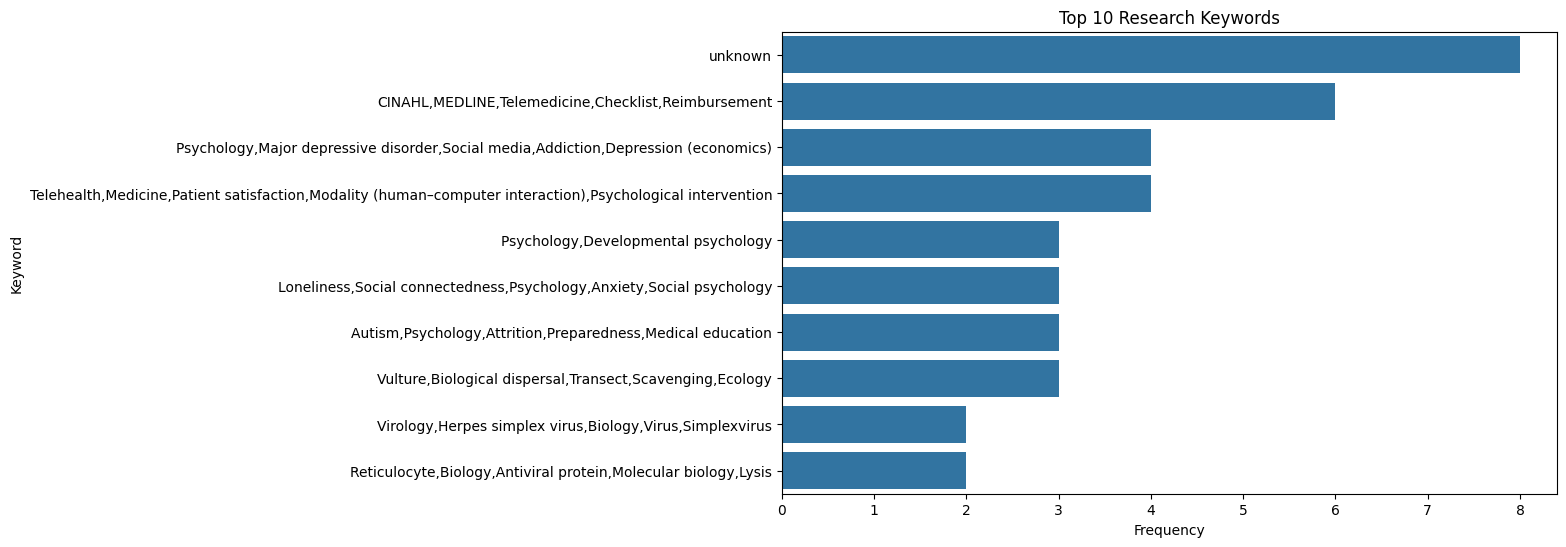

In [66]:
from collections import Counter
import itertools

# Aggregate all keywords
all_keywords = list(itertools.chain(*researchers_data_from_hopsworks['aggregated_keywords'].str.split(', ')))
keyword_counts = Counter(all_keywords)

# Plot the top 10 keywords
top_keywords = keyword_counts.most_common(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=[count for _, count in top_keywords], y=[keyword for keyword, _ in top_keywords])
plt.title('Top 10 Research Keywords')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.show()

###   i was concerned about the agency group column and there being "unknown in research columns "

In [69]:
unknown_count = grants_data_from_hopsworks['agency_group'].value_counts().get('unknown', 0)
print(f"Number of 'unknown' agency groups: {unknown_count}")

Number of 'unknown' agency groups: 3470


In [71]:
grants_data_from_hopsworks = grants_data_from_hopsworks.drop(columns=['agency_group'])

In [72]:
print("Columns after removing 'agency_group':", grants_data_from_hopsworks.columns.tolist())

Columns after removing 'agency_group': ['opportunity_id', 'opportunity_number', 'opportunity_title', 'opportunity_status', 'agency', 'agency_code', 'agency_name', 'category', 'award_ceiling', 'award_floor', 'estimated_total_funding', 'expected_awards', 'post_date', 'close_date', 'funding_categories', 'applicant_types', 'funding_instruments', 'summary_description', 'eligibility_description', 'funding_range', 'summary_description_length', 'eligibility_description_length', 'funding_types_count', 'applicant_types_count', 'has_funding_limit', 'funding_range_score', 'funding_type_diversity', 'description_complexity', 'agency_reputation_score', 'summary_keywords', 'funding_urgency']
